## Oficina Introdução de Machine learning para mulheres - Elas programam

Para incentivar a vinda de mais mulheres para a área de Inteligência Artificial e ciência de dados, a comunidade Elas Programam está trazendo essa oficina, onde desmistifica o machine learning e algumas bibliotecas do python.

## Bibliotecas que serão utilizadas

In [1]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from IPython.display import Image  
from sklearn import tree
import pydotplus
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Leitura de arquivos csv com pandas:

In [2]:
df = pd.read_csv('data/iris.data.csv')

Exibindo os valores armazenados:

In [3]:
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Explorando o dataset

#### Oque é um dataset?
Dataset é um conjunto de dados. Os formatos mais comuns de um dataset é csv e excel.

Quais tipos de flores temos no dataset?

In [4]:
df['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

Temos 3 tipos de flores existentes no nosso dataset.

<BarContainer object of 150 artists>

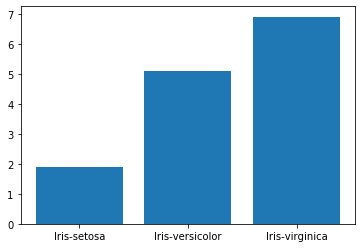

In [5]:
plt.bar(df['class'],df['petal length'])

Podemos notar que as flores do tipo Iris-virginica apresentam tamanhos de pétalas grandes

<BarContainer object of 150 artists>

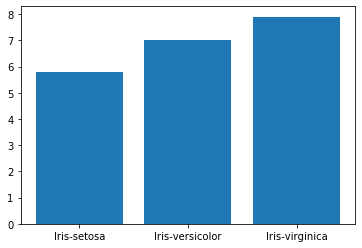

In [6]:
plt.bar(df['class'],df['sepal length'])

#### Okay, parece que quando maior for o tamanho da pétala, maior é o tamanho da sépala, será?!

<BarContainer object of 150 artists>

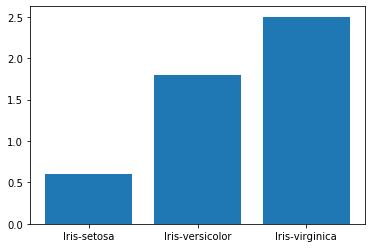

In [7]:
plt.bar(df['class'],df['petal width'])

<BarContainer object of 150 artists>

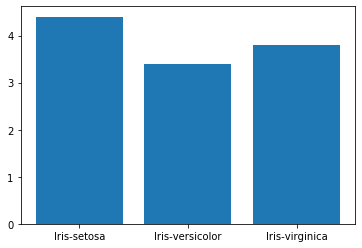

In [8]:
plt.bar(df['class'],df['sepal width'])

#### Que estranho, o tamanho da largura das pétalas da Iris setosa é maior que as outras!

## Será que o tamanho da pétala influencia no tamanho da sépala?

Para saber se uma variável tem influência no comportamento de outra precisamos validar a correlação entre elas, portanto utilizaremos o comando "df.corr()"

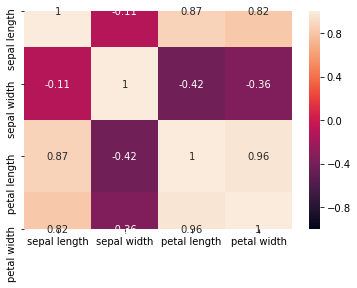

In [9]:
sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1)

Conforme indicado no mapa de calor de correlação, o tamanho da pétala tem uma influência forte e positiva com o tamanho da sépala, ou seja conforme aumenta o tamanho das pétalas consequentemente o tamanho da sépala aumenta.

Podemos perceber que a largura da pétala tem uma influência forte e positiva também no tamanho da sépala, ou seja conforme aumenta o tamanho da pétala a largura dela aumenta.
Portanto as duas influenciam o tamanho da sépala, mas o tamanho da peátala tem uma influência um pouco maior.

O tamanho da pétala tem uma forte influência na largura da pétala, portanto conforme aumenta o tamanho dá petala aumenta a largura da pétala.

### Diferença entre variáveis com influências fortes e uma variável com influência fraca

Text(0.5, 1.0, 'Sepal Length X Petal Length')

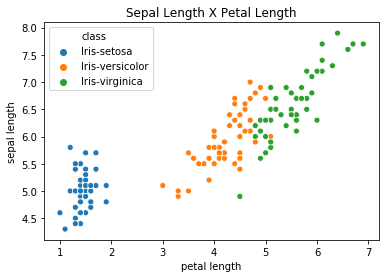

In [10]:
sns.scatterplot(df['petal length'],df['sepal length'],hue='class',data=df)
plt.title('Sepal Length X Petal Length')

Text(0.5, 1.0, 'Sepal Length X Petal Width')

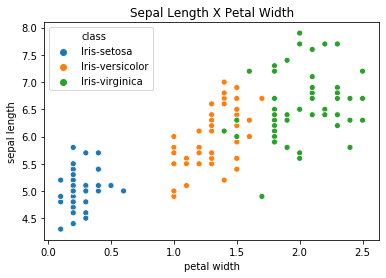

In [11]:
sns.scatterplot(df['petal width'],df['sepal length'],hue='class',data=df)
plt.title('Sepal Length X Petal Width')

### Verificação de outliers

#### O que são outliers?
Outliers são dados com valores discrepantes, ou seja, quando nosso dado tem um valor atípico dos demais.
#### Como eu detecto a presença deles?
Uma das formas mais usadas para verificar a existência de outliers é usando o gráfico chamado boxplot,juntamente com análises univariadas e multivariada.

**Análise univariada: o outlier pode ser detectado ao se analisar a distribuição de 1 variável simples.

**Análise multivariada: o outlier pode ser detectado ao se analisar mais de uma variável ou espaço "n-dimensional"

#### Porque você precisa se preocupar com a presença de outliers?
Outliers pode confundir nossas análises nos dando uma falsa impressão dos dados que temos e alguns modelos de machine learning, como por exemplo o K-means.

#### Como você "lê" um boxplot?

Bom meninas, o boxplot é dividido em 3 quartis. 

O primeiro quartil representa 25% dos dados menores que a mediana.

O segundo quartil representa 50% dos dados, ou seja é a nossa mediana.

O terceiro quartil representa 75% dos dados maiores que a mediana.

Qualquer dado que estiver acima ou abaixo dos nossos limites máximos e minimos são considerados outliers.

![alt text](boxplot.png "Boxplot")


### Análise univariada

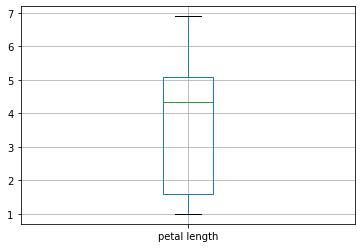

In [12]:
df.boxplot(['petal length'])

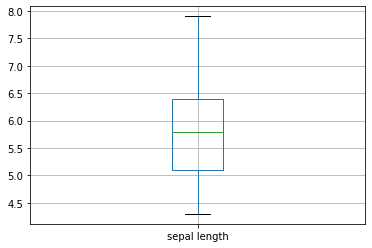

In [13]:
df.boxplot(['sepal length'])

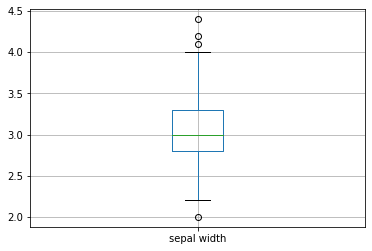

In [14]:
df.boxplot(['sepal width'])

Podemos notar que no sepal width há presença de outliers

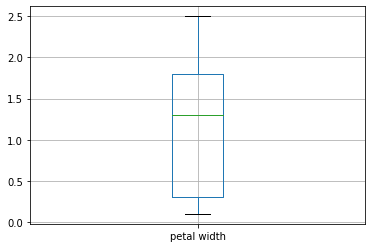

In [15]:
df.boxplot(['petal width'])

### Analise Multivariada

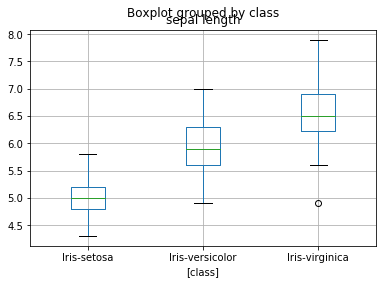

In [16]:
df.boxplot(['sepal length'],by=['class'])

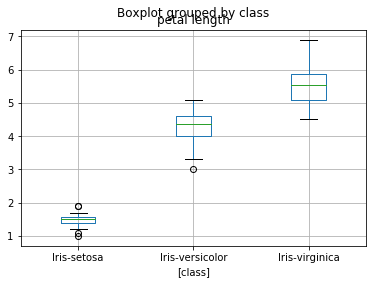

In [17]:
df.boxplot(['petal length'],by=['class'])

## Criando nosso primeiro modelo de classificação usando Árvore de decisão

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO
import matplotlib.image as mpimg
from sklearn import tree
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import *
from sklearn.metrics import mean_squared_error
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix


/Users/lauradamacenodealmeida/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [19]:
X = df.iloc[:,:4] #estou pegando as 4 colunas do dataset ('sepal length','sepal width','petal width','petal length')
Y = np.array(df['class'])

x1,x1_test,y1,y1_test = train_test_split(X,Y,test_size=0.3,random_state=100)

arvore = DecisionTreeClassifier()

arvore.fit(x1,y1)
arvore.score(x1_test,y1_test)

0.9555555555555556

## Visualizar a árvore de decisão

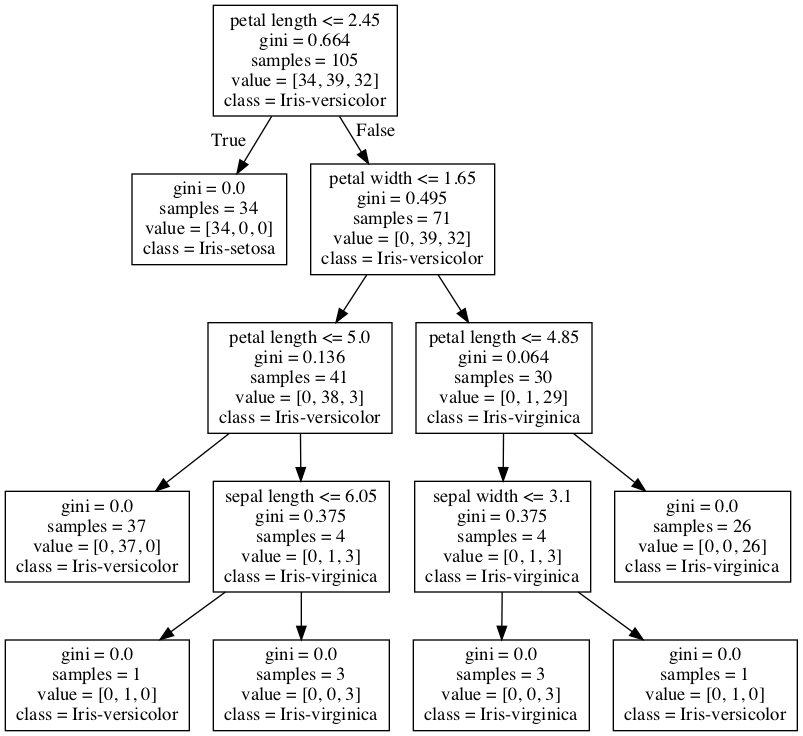

In [20]:
dot_data = StringIO()
tree.export_graphviz(arvore,out_file=dot_data,
                feature_names = df.columns[:4],
                class_names=df['class'].unique())
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

Exportaremos a imagem para um formato PNG:

In [21]:
#graph.write_png("iris.png")